# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

## Continuous Features

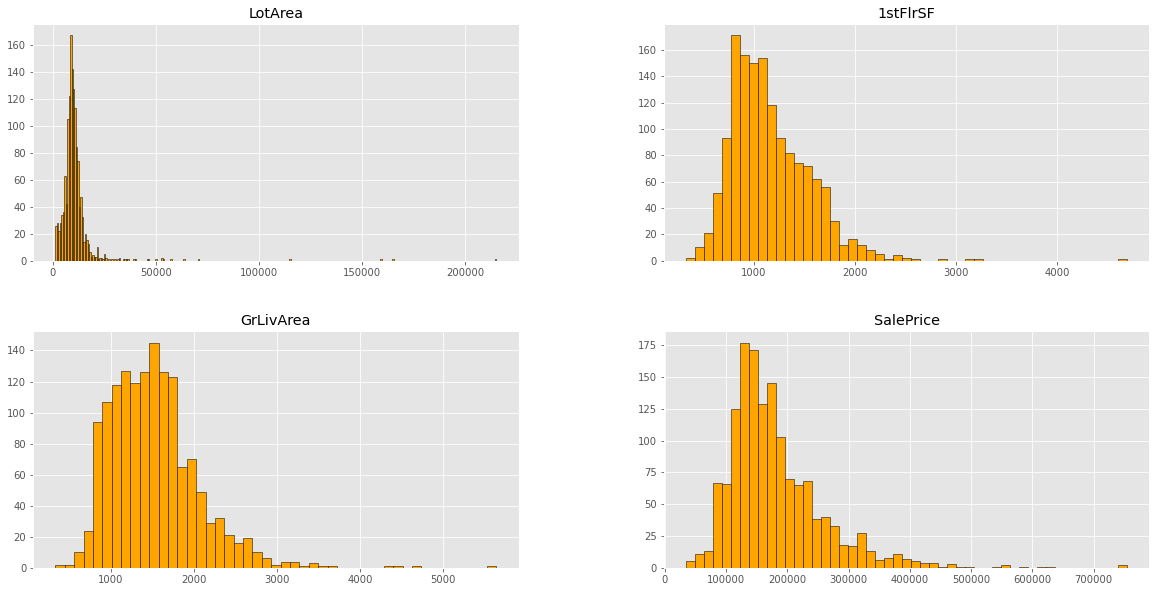

In [3]:
# Visualize continuous Features using Histograms
ames[continuous].hist(figsize=(20,10), bins='auto', color='orange', edgecolor='black');

### Log Transform

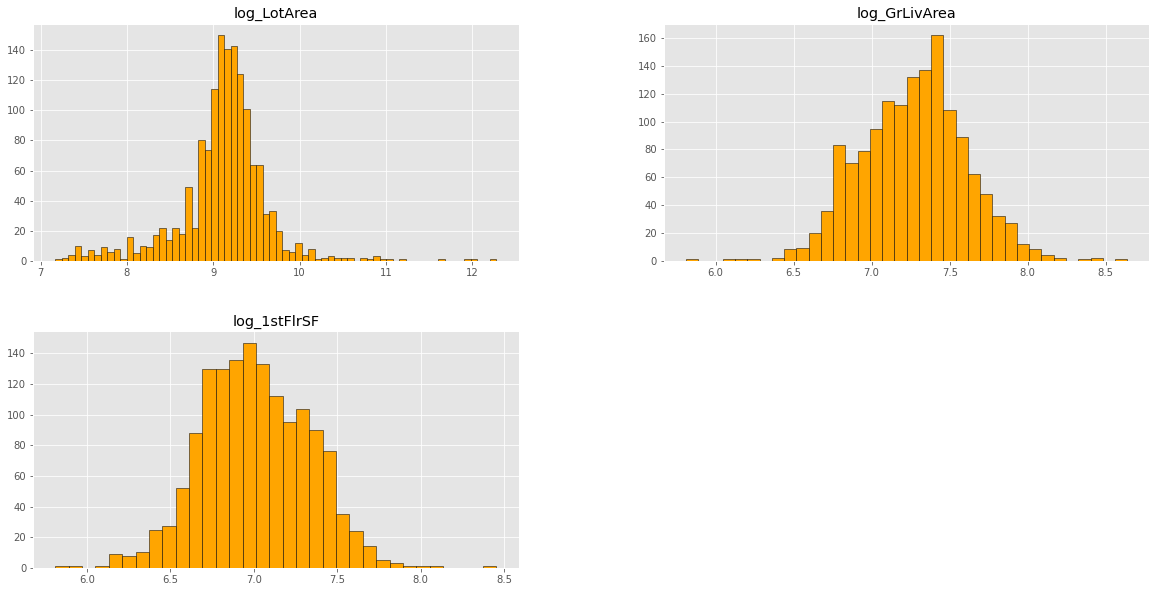

In [4]:
# LotArea, GrLivArea and 1stFlrSF seem to be right skewed
# --> apply log transformation on these features to see if they'll look more normal
to_log = ['LotArea', 'GrLivArea', '1stFlrSF']

# create a log transform function that takes in 2 arguments:
# - 1st arg: list of columns to be transformed
# - 2nd arg: dataframe
def log_transform(cols, dt):
    dt_log = pd.DataFrame([])
    for c in cols:
        dt_log[f'log_{c}'] = np.log(dt[c])
        
    return dt_log

# apply log_transform on the 3 selected features 
log_ames_cont = log_transform(to_log, ames[continuous])
log_ames_cont.hist(figsize=(20,10), bins='auto', color='orange', edgecolor='black');

In [5]:
# Histograms of these features after log transformation do look more normally distributed

### Standardization

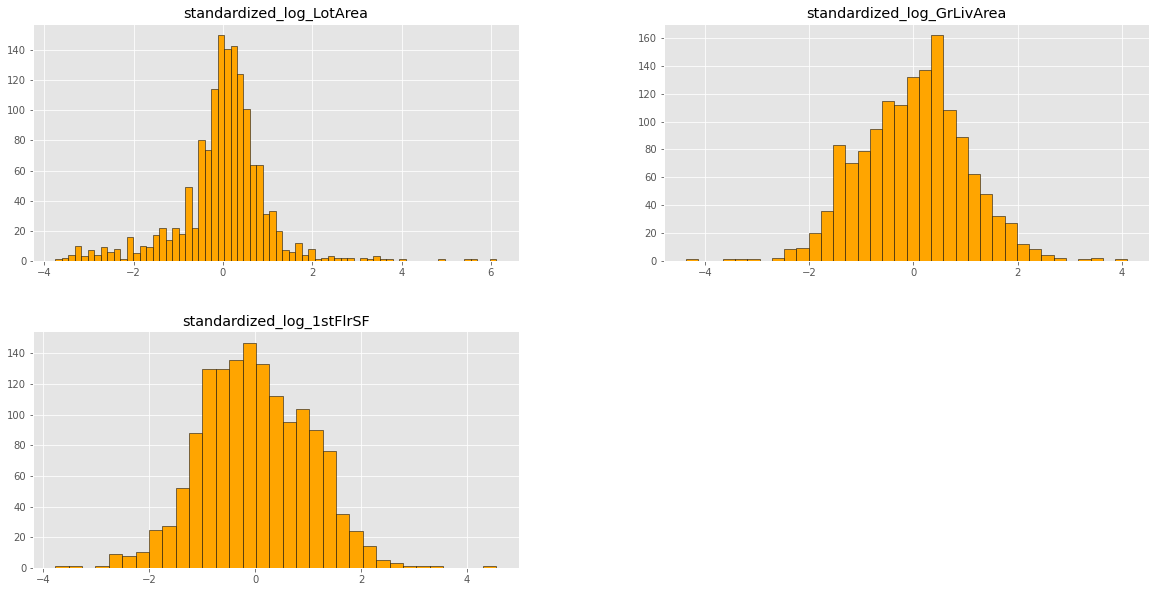

In [6]:
# Now that we have more normally distrbuted input data, we can apply standardization on them
# to change the mean to 0 and standard deviation to 1
to_standardize = ['log_LotArea', 'log_GrLivArea', 'log_1stFlrSF']

# Create a standardization function that takes in 2 arguments:
# - 1st arg: list of columns to be standardized
# - 2nd arg: dataframe
def standardize(cols, dt):
    dt_standard = pd.DataFrame([])
    for c in cols:
        dt_standard[f'standardized_{c}'] = (dt[c] - np.mean(dt[c])) / np.std(dt[c])
    return dt_standard

# Apply standardize on log_ames_cont
final_cont = standardize(to_standardize, log_ames_cont)
final_cont.hist(figsize=(20,10), bins='auto', color='orange', edgecolor='black');

## Categorical Features

In [7]:
# One-hot encoding for categorical data
final_cat = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

## Combine Categorical and Continuous Features

In [8]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([final_cont, final_cat, ames.SalePrice], axis=1)

In [9]:
preprocessed.head()

,standardized_log_LotArea,standardized_log_GrLivArea,standardized_log_1stFlrSF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SalePrice
0,-0.133231,0.529260,-0.803570,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,208500
1,0.113442,-0.381846,0.418585,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,181500
2,0.420061,0.659675,-0.576560,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,223500
3,0.103347,0.541511,-0.439287,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,140000
4,0.878409,1.282191,0.112267,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,250000


## Run a linear model with SalePrice as the target variable in statsmodels

In [10]:
# Your code here
outcome = 'SalePrice'
predictors = preprocessed.drop('SalePrice', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     124.6
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:39:38   Log-Likelihood:                -17348.
No. Observations:                1460   AIC:                         3.479e+04
Df Residuals:                    1412   BIC:                         3.505e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.428e+05    2.3e+04     10.569      0.000    1.98e+05    2.88e+05
standardized_log_LotArea    1.015e+04   1645.383      6.169      0.000    6922.255    1.34e+04
standardized_log_GrLivArea  2.464e+04   1362.992     18.080      0.000     2.2e+04    2.73e+04
standardized_log_1stFlrSF   1.069e+04   1393.424      7.673      0.000    7957.651    1.34e+04
BldgType_2fmCon            -1.547e+04   6885.909     -2.247      0.025    -2.9e+04   -1963.124
BldgType_Duplex            -2.946e+04   5383.318     -5.473      0.000      -4e+04   -1.89e+04
BldgType_Twnhs             -1.903e+04   8093.233     -2.351      0.019   -3.49e+04   -3151.964
BldgType_TwnhsE            -1.795e+04   5204.902     -3.449      0.001   -2.82e+04   -7741.004
KitchenQual_Fa             -8.558e+04   7710.123    -11.100      0.000   -1.01e+05   -7.05e+04
KitchenQual_Gd              -5.88e+04   4378.414    -13.430      0.000   -6.74e+04   -5.02e+04
KitchenQual_TA             -7.654e+04   4821.431    -15.876      0.000    -8.6e+04   -6.71e+04
SaleType_CWD                2.328e+04   1.88e+04      1.240      0.215   -1.36e+04    6.01e+04
SaleType_Con                6.056e+04   2.65e+04      2.282      0.023    8505.875    1.13e+05
SaleType_ConLD               1.71e+04   1.36e+04      1.262      0.207   -9478.767    4.37e+04
SaleType_ConLI              1.395e+04    1.7e+04      0.819      0.413   -1.95e+04    4.74e+04
SaleType_ConLw              5959.6243   1.71e+04      0.349      0.727   -2.75e+04    3.95e+04
SaleType_New                2.993e+04   6880.385      4.350      0.000    1.64e+04    4.34e+04
SaleType_Oth                1.333e+04   2.14e+04      0.622      0.534   -2.87e+04    5.53e+04
SaleType_WD                 1.215e+04   5699.364      2.131      0.033     964.989    2.33e+04
MSZoning_FV                 3.148e+04   1.68e+04      1.869      0.062   -1557.958    6.45e+04
MSZoning_RH                 1.695e+04    1.7e+04      1.000      0.318   -1.63e+04    5.02e+04
MSZoning_RL                 1.926e+04   1.41e+04      1.363      0.173   -8457.742     4.7e+04
MSZoning_RM                 3.339e+04   1.32e+04      2.522      0.012    7415.251    5.94e+04
Street_Pave                -1652.5399   1.57e+04     -0.105      0.916   -3.25e+04    2.92e+04
Neighborhood_Blueste        7415.5890   2.77e+04      0.267      0.789    -4.7e+04    6.18e+04
Neighborhood_BrDale        -1.532e+04   1.49e+04     -1.029      0.304   -4.45e+04    1.39e+04
Neighborhood_BrkSide       -5.044e+04    1.2e+04     -4.212      0.000   -7.39e+04   -2.69e+04
Neighborhood_ClearCr       -3.014e+04   1.26e+04     -2.393      0.017   -5.49e+04   -5432.316
Neighborhood_CollgCr       -1.725e+04   1.04e+04     -1.666      0.096   -3.76e+04    3066.425
Neighborhood_Crawfor       -1.343e+04   1.1

## Run the same model in scikit-learn

In [11]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels

from sklearn.linear_model import LinearRegression
y = preprocessed['SalePrice']
linreg = LinearRegression()
linreg.fit(predictors, y)

LinearRegression()

In [12]:
# Convert Scikit Learn results into a pandas Series
sk_results = np.insert(linreg.coef_, 0, linreg.intercept_, axis=0)
sk_s = pd.Series(sk_results, index=model.params.index)

In [13]:
# Concatenate Statsmodels & Scikit-Learn results into 1 dataframe for comparison
final_results = pd.concat([model.params, sk_s], axis=1)
final_results.columns = ['Statsmodels', 'Scikit-Learn']
final_results

,Statsmodels,Scikit-Learn
Intercept,242772.116943,242772.116943
standardized_log_LotArea,10149.912319,10149.912319
standardized_log_GrLivArea,24642.943219,24642.943219
standardized_log_1stFlrSF,10691.054148,10691.054148
BldgType_2fmCon,-15470.836031,-15470.836031
BldgType_Duplex,-29460.332470,-29460.332470
BldgType_Twnhs,-19028.017923,-19028.017923
BldgType_TwnhsE,-17951.176820,-17951.176820
KitchenQual_Fa,-85579.022510,-85579.022510
KitchenQual_Gd,-58800.964117,-58800.964117


In [ ]:
# The results are the same!

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [14]:
# Transform the values of test house:

test_house = {'LotArea': 14977, '1stFlrSF': 1976, 'GrLivArea': 1976, 'BldgType': '1Fam', 'KitchenQual': 'Gd',
              'SaleType': 'New', 'MSZoning': 'RL', 'Street': 'Pave', 'Neighborhood': 'NridgHt'}

# initialize transformed vector
test_house_transformed = np.zeros(48)

# first value corresponds with the intercept
test_house_transformed[0] = 1

# Get the standardized values of continuous variables after log transformation
continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
idx = 1
for c in continuous:
    logged = np.log(test_house[c])
    stdized = (logged - np.mean(log_ames_cont[f'log_{c}'])) / np.std(log_ames_cont[f'log_{c}'])
    test_house_transformed[idx] = stdized
    idx += 1
    
# Convert categorical values 
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

for c in categoricals:
    # find the index of test_house[c] in unique value list
    i = list(ames[c].unique()).index(test_house[c])
    
    # if index of test_house[c] is not 0 (as we dropped the first value)
    if i != 0:
        # update the corresponding value in test_house_transformed to 1
        test_house_transformed[idx + i - 1] = 1
        
    # increment idx by the length of ames[c].unique() - 1
    idx += (len(ames[c].unique()) - 1)

test_house_transformed

array([1.        , 0.97324786, 1.83025654, 0.96286942, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [15]:
# Get the dot product of 2 vectors to get the predicted price
np.dot(model.params.values, np.transpose(test_house_transformed))

304417.2136435864

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!